In [ ]:
import nltk
import os
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
import pandas as pd
import re
from nltk.tokenize import sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Vamos criar o corpus das críticas positivas

In [ ]:
corpus_critica_positiva_path = 'positivo/'
corpus_critica_positiva = PlaintextCorpusReader(corpus_critica_positiva_path,'.*')
print('O corpus tem',len(corpus_critica_positiva.fileids()),'textos', 
len(corpus_critica_positiva.words()), 'palavras e', len(corpus_critica_positiva.sents()), 'sentenças')

O corpus tem 48 textos 4876 palavras e 176 sentenças


In [ ]:
#Calcularemos a diversiade lexical
def lexical_diversity(texto):
    return len(set(texto)) / len(texto)

print("Diversidade do corpus:", 
    100*lexical_diversity(corpus_critica_positiva.words()), '%')

Diversidade do corpus: 26.45611156685808 %


# Agora com as críticas negativas

In [ ]:
corpus_critica_negativa_path = 'negativo/'
corpus_critica_negativa = PlaintextCorpusReader(corpus_critica_negativa_path,'.*')
print('O corpus tem',len(corpus_critica_negativa.fileids()),'textos', 
len(corpus_critica_negativa.words()), 'palavras e', len(corpus_critica_negativa.sents()), 'sentenças')

O corpus tem 62 textos 8139 palavras e 242 sentenças


In [ ]:
#Calcularemos a diversiade lexical
def lexical_diversity(texto):
    return len(set(texto)) / len(texto)

print("Diversidade do corpus:", 
    100*lexical_diversity(corpus_critica_negativa.words()), '%')

Diversidade do corpus: 26.096572060449684 %


# Etiquetando com o Cogroo

Primeiro inicializaremos o cogroo,depois atualizaremos suas tags

In [ ]:
from cogroo_interface import Cogroo
cogroo = Cogroo.Instance()

In [ ]:
classes_cogroo=['n', 'prop', 'art', 'pron', 'pron-pers', 'pron-det',
                'pron-indp', 'adj', 'n-adj', 'v', 'v-fin', 'v-inf',
                'v-pcp', 'v-ger', 'num', 'prp', 'adj', 'conj',
                'conj-s','conj-c', 'intj', 'adv', 'xxx']

In [ ]:
def _pos_tags(self):
    pos = {}
    pos.update({"n": "substantivo"})
    pos.update({"prop": "nome próprio"})
    pos.update({"art": "artigo"})
    pos.update({"pron": "pronome"})
    pos.update({"pron-pers": "pronome pessoal"})
    pos.update({"pron-det": "pronome determinativo"})
    pos.update({"pron-indp": "substantivo/pron-indp"})
    pos.update({"adj": "adjetivo"})
    pos.update({"n-adj": "substantivo/adjetivo"})
    pos.update({"v": "verbo"})
    pos.update({"v-fin": "verbo finitivo"})
    pos.update({"v-inf": "verbo infinitivo"})
    pos.update({"v-pcp": "verbo particípio"})
    pos.update({"v-ger": "verbo gerúndio"})
    pos.update({"num": "numeral"})
    pos.update({"prp": "preposição"})
    pos.update({"adj": "adjetivo"})
    pos.update({"conj": "conjunção"})
    pos.update({"conj-s": "conjunção subordinativa"})
    pos.update({"conj-c": "conjunção coordenativa"})
    pos.update({"intj": "interjeição"})
    pos.update({"adv": "advérbio"})
    pos.update({"xxx": "outro"})
    return pos

# pos: "part of speech"
pos = cogroo.pos_tags

# Análise morfológica dos 2 corpus

Análise do cogroo do corpus de críticas positivas, gerando a matriz tagged_j, incluindo apenas palavras e caracteres com classificações válidas:

In [ ]:
#Lista do que queremos remover
Lista = ['<','>','span','spoiler-heading','spoiler-warning','br','"">','spoiler','="""">', 'class', '=""', '-', 'header', ':', '</', 'class', '=""','.<', '><','"','=']

#Vamos criar uma variável que tenha somente o que queremos
atualizado = [word for word in corpus_critica_positiva.words() if word not in Lista]

#Vamos transformar essa lista em string
Novo = ' '.join(atualizado)
print(Novo)

De todos os filmes com certeza este está no meu top 3 . conseguiu captar a energia dos filmes antigos muito fanservice e um final brilhante realmente vale a pena a ver é um pouco corrido muitas informações É o melhor dessa trilogia da Disney ! Não é perfeito , mas é de longe desses 3 novos que melhor transmite a atmosfera de Star Wars ! Assisam ! o filme é bom eu gostei muito , tem suas falhas mas gostei , vale muito a pena assistir . O VISUAL ESTÁ INCRÍVEL Por mais que muitas pessoas não tenham gostado , estou aqui para falar minha opinião , eu gostei muito do filme , porém , ele tem falhas que não podem ser ignoradas . Não faz sentido o Palpatine ter ressuscitado assim do nada , mas isso não significa que eu não tenha gostado da participação dele no filme . Mas também trouxe coisas muito boas , como lutas , cenas de ação e etc , mas a coisa que eu mais gostei foi a ligação de Rey , Finn e Poe . Mas resumindo , eu gostei do filme e com certeza assistirei de novo . Filme incrível . Mui

In [ ]:
doc = cogroo.analyze(str(Novo))

sents_j = []

for st_j in doc.sentences:
    sents_j=sents_j+st_j.tokens

tagged_j = []

for tokens in sents_j:
    aux = re.split(r'#',str(tokens))
    aux2 = re.split(r' ',aux[1])
    if(aux2[0] in classes_cogroo):
        tagged_j = tagged_j + [(aux[0],aux2[0],aux2[1])]

print(tagged_j, end='')

[('De', 'prp', '-'), ('todos', 'pron-det', 'M=P'), ('os', 'art', 'M=P'), ('filmes', 'n', 'M=P'), ('com', 'prp', '-'), ('certeza', 'n', 'F=S'), ('este', 'pron-det', 'M=S'), ('está', 'v-fin', 'PR=3S=IND'), ('em', 'prp', '-'), ('o', 'art', 'M=S'), ('meu', 'pron-det', 'M=S'), ('top', 'n', 'M=S'), ('3', 'num', 'M=P'), ('conseguiu', 'v-fin', 'PS=3S=IND'), ('captar', 'v-inf', '-'), ('a', 'art', 'F=S'), ('energia', 'n', 'F=S'), ('de', 'prp', '-'), ('os', 'art', 'M=P'), ('filmes', 'n', 'M=P'), ('antigos', 'adj', 'M=P'), ('muito', 'adv', '-'), ('fanservice', 'n', 'M=S'), ('e', 'conj-c', '-'), ('um', 'art', 'M=S'), ('final', 'n', 'M=S'), ('brilhante', 'adj', 'M=S'), ('realmente', 'adv', '-'), ('vale', 'v-fin', 'PR=3S=IND'), ('a', 'art', 'F=S'), ('pena', 'n', 'F=S'), ('a', 'prp', '-'), ('ver', 'v-inf', '-'), ('é', 'v-fin', 'PR=3S=IND'), ('um', 'art', 'M=S'), ('pouco', 'pron-det', 'M=S'), ('corrido', 'v-pcp', 'M=S'), ('muitas', 'pron-det', 'F=P'), ('informações', 'n', 'F=P'), ('É', 'v-fin', 'PR=3S=

Análise do cogroo do corpus de críticas negativas, gerando a matriz tagged_j, incluindo apenas palavras e caracteres com classificações válidas:

In [ ]:
#Lista do que queremos remover
Lista = ['<','>','span','spoiler-heading','spoiler-warning','br','"">','spoiler','="""">', 'class', '=""', '-', 'header', ':', '</', 'class', '=""','.<', '><','"','=']

#Vamos criar uma variável que tenha somente o que queremos
atualizado2 = [word for word in corpus_critica_negativa.words() if word not in Lista]

#Vamos transformar essa lista em string
Novo2 = ' '.join(atualizado2)
print(Novo2)

horrivel , isso não é star wars . Não existe reposição de vida em estar wars , e beijo entre Kylo e Rey foi de fuder . inúmeras pontas soltas no roteiro . Quando foi anunciado que a Disney assumiria os direitos da franquia Star Wars , muitos se sentiram receosos com o que poderia vir na nova trilogia proposta pelo estúdio – será que os novos personagens estariam à altura do legado dos três filmes originais ? A resposta foi uma bela surpresa para todos ( bom , pelo menos a maioria ) – os novos protagonistas fizeram de O Despertar da Força um filme exemplar para a série – mesmo que ( habilmente ) se aproveitando da estrutura narrativa do episódio IV , mas servindo perfeitamente para introduzir estas novas caras para o público – já em Os Últimos Jedi , sob o roteiro e direção de Rian Johnson , está nova fase do universo de Star Wars ganhava um caminho mais novo – utilizando se levemente de elementos dos episódios V e VI – e , assim , mantendo a ótima qualidade do filme anterior de J . J .

In [ ]:
doc2 = cogroo.analyze(str(Novo2))

sents_k = []

for st_k in doc2.sentences:
    sents_k=sents_k+st_k.tokens

tagged_k = []



for tokens in sents_k:
    aux = re.split(r'#',str(tokens))
    aux2 = re.split(r' ',aux[1])
    if(aux2[0] in classes_cogroo):
        tagged_k = tagged_k + [(aux[0],aux2[0],aux2[1])]

print(tagged_k, end='')

[('horrivel', 'n', 'F=S'), ('isso', 'pron-indp', 'M=S'), ('não', 'adv', '-'), ('é', 'v-fin', 'PR=3S=IND'), ('star', 'v-inf', '-'), ('wars', 'n', 'M=P'), ('Não', 'adv', '-'), ('existe', 'v-fin', 'PR=3S=IND'), ('reposição', 'n', 'F=S'), ('de', 'prp', '-'), ('vida', 'n', 'F=S'), ('em', 'prp', '-'), ('estar', 'v-inf', '-'), ('wars', 'n', 'M=P'), ('e', 'conj-c', '-'), ('beijo', 'n', 'M=S'), ('entre', 'prp', '-'), ('Kylo', 'prop', 'M=S'), ('e', 'conj-c', '-'), ('Rey', 'prop', 'M=S'), ('foi', 'v-fin', 'PS=3S=IND'), ('de', 'prp', '-'), ('fuder', 'v-inf', '-'), ('inúmeras', 'adj', 'F=P'), ('pontas', 'n', 'F=P'), ('soltas', 'v-fin', 'F=P'), ('em', 'prp', '-'), ('o', 'art', 'M=S'), ('roteiro', 'n', 'M=S'), ('Quando', 'adv', '-'), ('foi', 'v-fin', 'PS=3S=IND'), ('anunciado', 'v-pcp', 'M=S'), ('que', 'conj-s', '-'), ('a', 'art', 'F=S'), ('Disney', 'prop', 'F=S'), ('assumiria', 'v-fin', 'COND=3S'), ('os', 'art', 'M=P'), ('direitos', 'n', 'M=P'), ('de', 'prp', '-'), ('a', 'art', 'F=S'), ('franquia', 

# Adjetivos, substantivos e verbos de destaque

Primeiro vamos olhar quais são os adjetivos e substantivos mais presentes em cada corpus.

Com o corpus de críticas positivas:

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
#Criacao de uma string da classe
adjetivos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'adjetivo'):
        adjetivos_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar a string
tokens_j = word_tokenize(adjetivos_j)

#Gerar a distribuição de frequência
fDist_adj_j = FreqDist(word for word in tokens_j)

fDist_adj_j

FreqDist({'ótimo': 14, 'novo': 12, 'bom': 12, 'melhor': 12, 'último': 9, 'nova': 9, 'grande': 7, 'excelente': 7, 'épico': 5, 'maior': 5, ...})

No handles with labels found to put in legend.


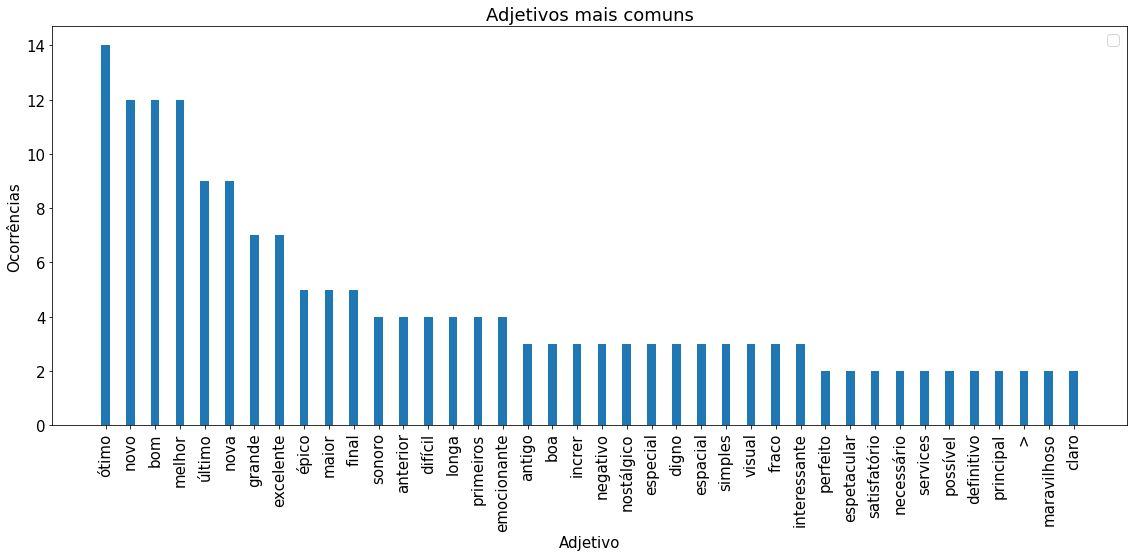

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x=fDist_adj_j.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Adjetivos mais comuns')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Adjetivo')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

In [ ]:
#Criacao de uma string da classe
substantivos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j[i][1] ] == 'substantivo'):
        substantivos_j  += cogroo.lemmatize( tagged_j[i][0] ) + ' '
    i = i + 1

#Tokenizar a string
tokens_j = word_tokenize(substantivos_j)

#Gerar a distribuição de frequência
fDist_subst_j = FreqDist(word for word in tokens_j)

fDist_subst_j

FreqDist({'filme': 113, 'saga': 22, 'personagem': 18, 'fã': 16, 'história': 14, 'final': 13, 'ação': 13, 'trilogia': 12, 'episódio': 12, '=': 12, ...})

No handles with labels found to put in legend.


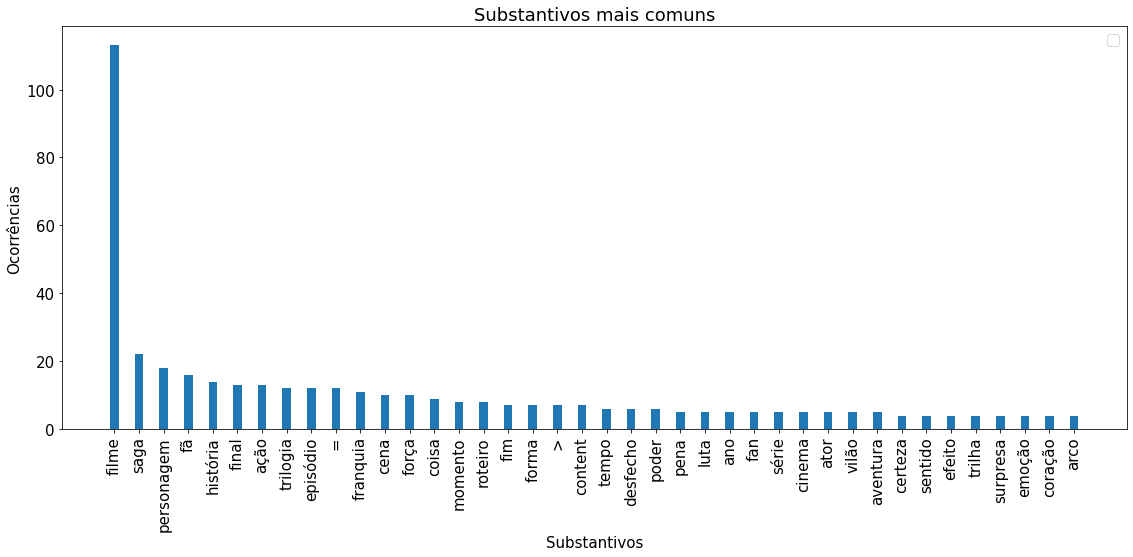

In [ ]:
x=fDist_subst_j.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Substantivos mais comuns')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Substantivos')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

In [ ]:
#Criacao de uma string da classe
verbos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j [i][1] ] == 'verbo finitivo'):
        verbos_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_j = word_tokenize(verbos_j)
print(tokens_j)
#Gerar a distribuição de frequência
fDist_verb_j = FreqDist(word for word in tokens_j)

fDist_verb_j

['está', 'conseguiu', 'vale', 'é', 'É', 'é', 'é', 'transmite', 'Assisam', 'é', 'gostei', 'tem', 'gostei', 'vale', 'tenham', 'estou', 'gostei', 'tem', 'podem', 'faz', 'significa', 'tenha', 'trouxe', 'gostei', 'foi', 'gostei', 'assistirei', 'consegue', 'yoda', 'apareceu', 'divide', 'temos', 'é', 'estão', 'Temos', 'virou', 'falharam', 'temos', 'seja', 'tem', 'dei', 'gostei', 'deixa', 'aparece', 'leva', 'virá', 'criticam', 'vão', 'sou', 'gostei', 'faz', 'venham', 'poderia', 'deixou', 'quero', 'Assistam', 'encerra', 'precisa', 'é', 'cumpre', 'É', 'é', 'tem', 'é', 'tem', 'é', 'é', 'é', 'é', 'é', 'é', 'tivemos', 'ama', 'entregou', 'faltou', 'ficou', 'continuará', 'seja', 'esteja', 'evidencia', 'seja', 'é', 'acesse', 'critica', 'é', 'retorna', 'passa', 'são', 'vem', 'deixar', 'tinha', 'avança', 'foi', 'encontraram', 'colocaram', 'Resta', 'criarão', 'complementarão', 'vejo', 'gosta', 'gosta', 'são', 'chega', 'faz', 'encerra', '=', 'foi', 'assisti', 'prometeu', 'vai', 'é', 'traz', 'queriam', 'go

FreqDist({'é': 64, 'foi': 33, 'tem': 15, 'gostei': 11, 'são': 10, 'teve': 8, '=': 7, 'está': 6, 'faz': 6, 'poderia': 6, ...})

In [ ]:
#Criacao de uma string da classe
verbos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j [i][1] ] == 'verbo infinitivo'):
        verbos_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_j = word_tokenize(verbos_j)
print(tokens_j)
#Gerar a distribuição de frequência
fDist_verb_j = FreqDist(word for word in tokens_j)

fDist_verb_j

['captar', 'ver', 'assistir', 'falar', 'ser', 'ter', 'fechar', 'tirar', 'lembrar', 'saber', 'criticar', 'deixar', 'ter', 'ver', 'ser', 'ver', 'notar', 'brilhar', 'dizer', 'dizer', 'ler', 'seguir', 'star', 'dizer', 'encerrar', 'explorar', 'saber', 'ser', 'engolir', 'existir', 'esperar', 'juntar', 'ter', 'sair', 'aguardar', 'passar', 'virar', 'assistir', 'serem', 'despertar', 'arriscar', 'entreter', 'arrumar', 'ser', 'ter', 'entender', 'conhecer', 'entender', 'assistir', 'assistir', 'dormir', 'falar', 'ter', 'dar', 'hater', 'ser', 'dizer', 'relembrar', 'ver', 'despertar', 'trazer', 'arriscar', 'apresentar', 'fechar', 'passar', 'ter', 'ter', 'ter', 'inserir', 'causar', 'fechar', 'esquecer', 'ser', 'ter', 'colocar', 'emocionar', 'comprar', 'ter', 'star', 'salvar', 'dar', 'consertar', 'fazer', 'concertar', 'perceber', 'estar', 'terminar', 'fazer', 'interessar', 'ser', 'gostar', 'divertir', 'negar', 'sentir', 'deixar', 'discutir', 'tocar', 'ser', 'ser', 'ser', 'aprofundar', 'ver', 'ver', 'ar

FreqDist({'ser': 10, 'ter': 10, 'ver': 6, 'assistir': 4, 'fechar': 4, 'dizer': 4, 'falar': 2, 'saber': 2, 'deixar': 2, 'star': 2, ...})

In [ ]:
#Criacao de uma string da classe
verbos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j [i][1] ] == 'verbo gerúndio'):
        verbos_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_j = word_tokenize(verbos_j)
print(tokens_j)
#Gerar a distribuição de frequência
fDist_verb_j = FreqDist(word for word in tokens_j)

fDist_verb_j

['resumindo', 'tirando', 'amarrando', 'fechando', 'sendo', 'procurando', 'falando', 'acontecendo', 'programando', 'lembrando', 'falando', 'fazendo', 'sendo', 'apelando', 'falando', 'acontecendo', 'fechando', 'surpreendendo', 'começando', 'podendo', 'anulando', 'lembrando', 'atuando', 'assumindo', 'Resumindo', 'dividindo', 'adorando', 'odiando', 'ficando', 'adorando', 'reverenciando', 'lembrando', 'lembrando', 'assemelhando', 'fazendo', 'adorando', 'crescendo', 'amando']


FreqDist({'lembrando': 4, 'falando': 3, 'adorando': 3, 'fechando': 2, 'sendo': 2, 'acontecendo': 2, 'fazendo': 2, 'resumindo': 1, 'tirando': 1, 'amarrando': 1, ...})

In [ ]:
#Criacao de uma string da classe
verbos_j = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_j:
    if (pos[ tagged_j [i][1] ] == 'verbo particípio'):
        verbos_j  += ( tagged_j[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_j = word_tokenize(verbos_j)
print(tokens_j)
#Gerar a distribuição de frequência
fDist_verb_j = FreqDist(word for word in tokens_j)

fDist_verb_j

['corrido', 'gostado', 'ignoradas', 'ressuscitado', 'gostado', 'feito', 'seriado', 'esclarecidas', 'estruturada', 'amado', 'consagrados', 'partidos', 'conhecidos', 'feito', 'exagerados', 'tido', 'lotado', 'desvendadas', 'inseridas', 'confirmado', 'teorizadas', 'falecida', 'feito', 'trabalhado', 'sido', 'contada', 'seriados', 'feito', 'criticado', 'morrido', 'comparado', 'moldado', 'sith', 'disfarçada', 'explicadas', 'construída', 'esperada', 'forçado', 'resgatado', 'feito', 'aproveitados', 'sido', 'utilizado', 'morrido', 'vindo', 'sido', 'sido', 'rottentommatos', 'elaborado', 'desenfreada', 'utilizada', 'feitas', 'juntos', 'visto', 'desperdiçado', 'estruturado', 'derrapada', 'feitas', 'alinhado', 'bagunçado', 'Obrigado', 'feitas', 'trabalhados', 'trabalhada', 'dito', 'divididos', 'feita', 'feito', 'deixados', 'utilizados', 'divertido', 'explorados', 'explicado', 'apresentados', 'vistos', 'explorado', 'explicado', 'tratada', 'apaixonados', 'diagramadas']


FreqDist({'feito': 6, 'sido': 4, 'feitas': 3, 'gostado': 2, 'morrido': 2, 'explicado': 2, 'corrido': 1, 'ignoradas': 1, 'ressuscitado': 1, 'seriado': 1, ...})

In [ ]:
#Criacao de uma string classificações
classificacoes_j = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_j:
    classificacoes_j  = classificacoes_j + tagged_j[i][1] + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokens_j = word_tokenize(classificacoes_j)

#Usar o dicionário pos para traduzir as classificações
# para um formato legível
i = 0
for x in tokens_j:
    tokens_j[i] = pos[tokens_j[i]]
    i = i + 1

#Gerar e apresentar a distribuição de frequência
fDist_class_j = FreqDist(word for word in tokens_j)

fDist_class_j

FreqDist({'substantivo': 799, 'artigo': 544, 'preposição': 531, 'verbo finitivo': 476, 'advérbio': 344, 'adjetivo': 286, 'nome próprio': 227, 'pronome determinativo': 212, 'conjunção coordenativa': 187, 'verbo infinitivo': 109, ...})

No handles with labels found to put in legend.


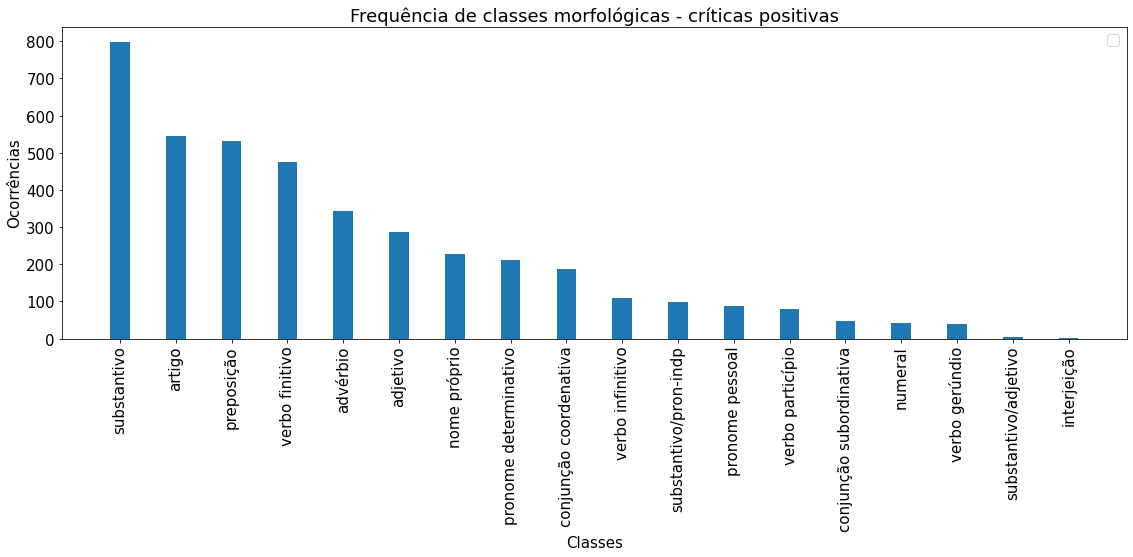

In [ ]:
x=fDist_class_j.most_common(20)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Frequência de classes morfológicas - críticas positivas')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Classes')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

Agora com o corpus negativo

In [ ]:
#Criacao de uma string da classe
adjetivos_k = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_k:
    if (pos[ tagged_k [i][1] ] == 'adjetivo'):
        adjetivos_k  += cogroo.lemmatize( tagged_k[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_k = word_tokenize(adjetivos_k)

#Gerar a distribuição de frequência
fDist_adj_k = FreqDist(word for word in tokens_k)

fDist_adj_k

FreqDist({'novo': 19, '–': 18, 'bom': 18, 'nova': 17, 'fraco': 17, 'pior': 14, 'melhor': 13, 'ruim': 11, 'último': 10, 'grande': 10, ...})

No handles with labels found to put in legend.


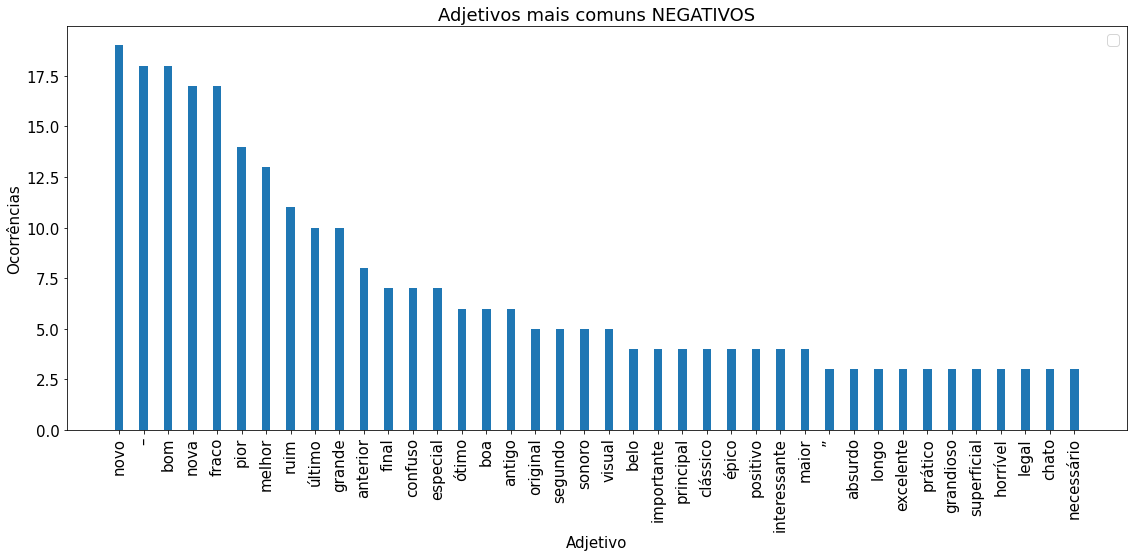

In [ ]:
x=fDist_adj_k.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Adjetivos mais comuns NEGATIVOS')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Adjetivo')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

In [ ]:
#Criacao de uma string da classe
substantivos_k = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_k:
    if (pos[ tagged_k [i][1] ] == 'substantivo'):
        substantivos_k  += cogroo.lemmatize( tagged_k[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_k = word_tokenize(substantivos_k)

#Gerar a distribuição de frequência
fDist_subst_k = FreqDist(word for word in tokens_k)

fDist_subst_k

FreqDist({'filme': 141, 'personagem': 38, 'trilogia': 33, 'saga': 32, 'final': 21, 'roteiro': 19, 'história': 19, 'cena': 18, 'efeito': 16, 'coisa': 16, ...})

No handles with labels found to put in legend.


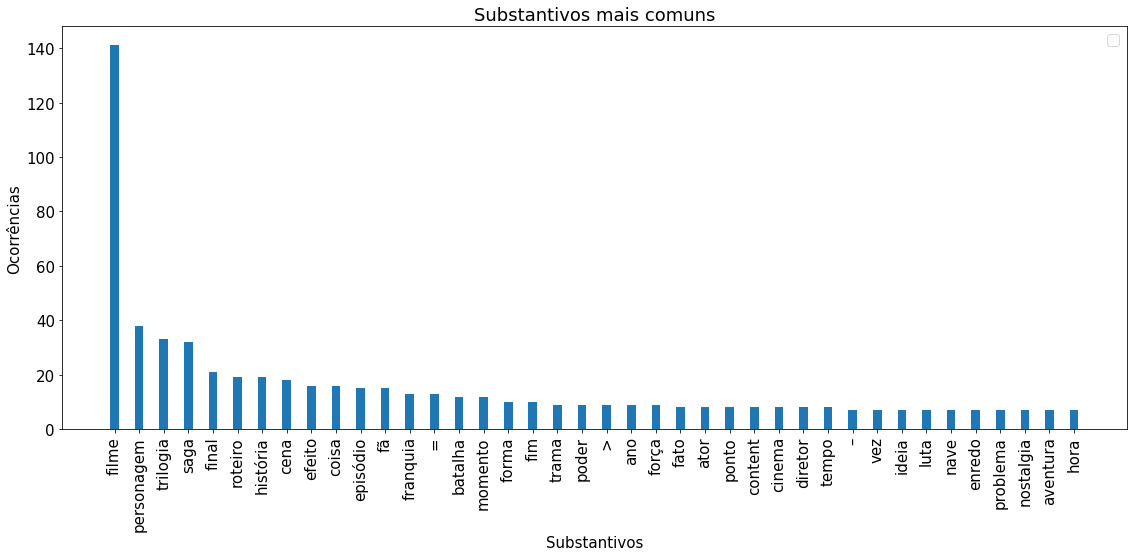

In [ ]:
x=fDist_subst_k.most_common(40)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Substantivos mais comuns')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Substantivos')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

In [ ]:
#Criacao de uma string da classe
verbos_k = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_k:
    if (pos[ tagged_k [i][1] ] == 'verbo finitivo'):
        verbos_k  += ( tagged_k[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_k = word_tokenize(verbos_k)
print(tokens_k)
#Gerar a distribuição de frequência
fDist_verb_k = FreqDist(word for word in tokens_k)

fDist_verb_k

['é', 'existe', 'foi', 'soltas', 'foi', 'assumiria', 'sentiram', 'poderia', 'será', 'estariam', 'foi', 'fizeram', 'está', 'ganhava', 'VI', 'retorna', 'está', 'consegue', 'pode', 'desaponta', 'termino', 'pude', 'parece', 'amarra', '–', 'inicio', 'está', 'é', 'descobre', 'está', 'prepara', 'tentam', 'esconde', 'tem', 'chega', 'deixa', 'é', 'atinge', 'era', 'estava', 'pensarmos', 'escapou', 'tenta', 'formula', 'usou', 'falha', 'repare', 'aparece', 'assemelha', 'são', 'tem', '–', 'tem', 'é', 'parece', 'tem', 'é', 'parecem', 'foram', 'surpreende', 'é', 'podia', 'faz', 'fez', 'parece', 'estivesse', 'tenho', 'era', 'inicio', 'inseri', 'funciona', 'funciona', 'agrada', 'tem', 'enfraquece', 'acredite', 'prova', 'está', 'garante', 'tenha', 'começa', 'coloca', 'pratica', 'peca', 'aparecem', 'faz', 'é', '–', 'consegue', 'encara', 'demonstram', '–', 'compõe', 'vai', 'passa', 'é', 'faz', 'havia', '–', 'falamos', 'capitulo', 'mostra', 'surpreende', 'seja', 'surgem', 'representa', 'é', 'desliza', 'par

FreqDist({'é': 121, 'foi': 34, 'tem': 22, 'são': 22, 'sou': 11, 'está': 10, 'pode': 9, 'faz': 9, '=': 8, 'poderia': 7, ...})

In [ ]:
#Criacao de uma string da classe
verbos_k = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_k:
    if (pos[ tagged_k [i][1] ] == 'verbo infinitivo'):
        verbos_k  += ( tagged_k[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_k = word_tokenize(verbos_k)
print(tokens_k)
#Gerar a distribuição de frequência
fDist_verb_k = FreqDist(word for word in tokens_k)

fDist_verb_k

['star', 'estar', 'fuder', 'vir', 'introduzir', 'concluir', 'fazer', 'deixar', 'notar', 'explicar', 'tentar', 'recriar', 'dizimar', 'livrar', 'ir', 'eliminar', 'conseguir', 'tomar', 'confrontar', 'soar', 'ter', 'aparecer', 'falar', 'usar', 'falar', 'estar', 'esperar', 'estar', 'revisitar', 'sentir', 'ser', 'motivar', 'inserir', 'demostrar', 'ser', 'conseguir', 'enfrentar', 'ser', 'descobrir', 'misturar', 'demonstrar', 'impressionar', 'criar', 'fazer', 'parecer', 'estar', 'fazer', 'agradar', 'ser', 'entender', 'hollywoodizar', 'utilizar', 'construir', 'assistir', 'engolir', 'arrecadar', 'ser', 'reciclar', 'dizer', 'ser', 'ser', 'gerar', 'temer', 'ser', 'conseguir', 'partir', 'doer', 'continuar', 'dar', 'abrir', 'ficar', 'colocar', 'ser', 'vender', 'ser', 'usar', 'ver', 'despertar', 'mostrar', 'descrever', 'ter', 'estar', 'saber', 'contar', 'entender', 'lançar', 'ter', 'lançar', 'tentar', 'corrigir', 'ser', 'fazer', 'treinar', 'justificar', 'ser', 'preencher', 'querer', 'colocar', 'haver

FreqDist({'ser': 27, 'fazer': 14, 'ter': 12, 'ver': 10, 'falar': 7, 'estar': 6, 'agradar': 5, 'dar': 5, 'star': 4, 'tentar': 4, ...})

In [ ]:
#Criacao de uma string da classe
verbos_k = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_k:
    if (pos[ tagged_k [i][1] ] == 'verbo gerúndio'):
        verbos_k  += ( tagged_k[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_k = word_tokenize(verbos_k)
print(tokens_k)
#Gerar a distribuição de frequência
fDist_verb_k = FreqDist(word for word in tokens_k)

fDist_verb_k

['aproveitando', 'servindo', 'utilizando', 'mantendo', 'conseguindo', 'finalizando', 'precisando', 'tratando', 'substituindo', 'trazendo', 'fazendo', 'mudando', 'esquivando', 'encontrando', 'fazendo', 'parecendo', 'adicionando', 'vendo', 'copiando', 'sendo', 'Treinando', 'vendo', 'tentando', 'tentando', 'assistindo', 'mostrando', 'passando', 'trazendo', 'deixando', 'colocando', 'usando', 'cortando', 'sendo', 'Falando', 'apresentando', 'correndo', 'cansando', 'dando', 'sendo', 'Comparando', 'beijando', 'desanimando', 'Explicando', 'levando', 'tendo', 'conversando', 'possuindo', 'manchando', 'comprando', 'jogando', 'substituindo', 'abordando', 'Sendo', 'assistindo', 'dando', 'estragando', 'acompanhando', 'sendo', 'ressuscitando', 'Olhando', 'respondendo', 'ficando', 'sendo', 'tentando', 'acontecendo', 'fazendo', 'aprendendo', 'sofrendo', 'sangrando', 'lutando', 'alterando', 'sendo', 'interpretando', 'desperdiçando', 'indo', 'mostrando', 'pensando']


FreqDist({'sendo': 6, 'fazendo': 3, 'tentando': 3, 'substituindo': 2, 'trazendo': 2, 'vendo': 2, 'assistindo': 2, 'mostrando': 2, 'dando': 2, 'aproveitando': 1, ...})

In [ ]:
#Criacao de uma string da classe
verbos_k = ''

#Colocar nessa string as palavras lematizadas que correspondem
# à classe desejada
i = 0
for x in tagged_k:
    if (pos[ tagged_k [i][1] ] == 'verbo particípio'):
        verbos_k  += ( tagged_k[i][0] ) + ' '
    i = i + 1


#Tokenizar a string
tokens_k = word_tokenize(verbos_k)
print(tokens_k)
#Gerar a distribuição de frequência
fDist_verb_k = FreqDist(word for word in tokens_k)

fDist_verb_k

['anunciado', 'proposta', 'forçadas', 'liderada', 'imposta', 'sido', 'citado', 'passados', 'passados', 'aproveitados', 'simplificada', 'relegada', 'simplificadas', 'finalizadas', 'passadas', 'pensada', 'suada', 'mostrado', 'passados', 'pressionado', 'sido', 'mostrado', 'piscadas', 'destruído', 'abalados', 'passados', 'colocado', 'mencionadas', 'ignoradas', 'começado', 'consagradas', 'empolgado', 'construído', 'divertido', 'feito', 'chamado', 'forçado', 'contada', 'infantilizada', 'forçado', 'entregue', 'feito', 'aproveitados', 'contada', 'chamado', 'usada', 'demorada', 'dirigido', 'acompanhado', 'visto', 'finalizado', 'apaixonadas', 'desordenada', 'comparado', 'comparado', 'derivadas', 'feita', 'revisada', 'esquecido', 'destruído', 'explicado', 'destruída', 'morrido', 'contornadas', 'feita', 'empenhado', 'dedicado', 'frustrados', 'envergonhado', 'lançados', 'puxado', 'jogado', 'emendadas', 'convertido', 'idealizado', 'escolhido', 'contada', 'perdido', 'impressionado', 'bagunçado', 'for

FreqDist({'feito': 9, 'sido': 5, 'passados': 4, 'contada': 4, 'forçado': 3, 'aproveitados': 2, 'mostrado': 2, 'destruído': 2, 'divertido': 2, 'chamado': 2, ...})

In [ ]:
#Criacao de uma string classificações
classificacoes_k = ''

#Colocar nessa string a classificacao morfologica de cada palavra
# na matriz etiquetada do corpus
i = 0
for x in tagged_k:
    classificacoes_k  = classificacoes_k + tagged_k[i][1] + ' '
    i = i + 1

#Tokenizar essa string, sendo identificada cada palavra/classificação
# como elemento da lista tokens
tokens_k = word_tokenize(classificacoes_k)

#Usar o dicionário pos para traduzir as classificações
# para um formato legível
i = 0
for x in tokens_k:
    tokens_k[i] = pos[tokens_k[i]]
    i = i + 1

#Gerar e apresentar a distribuição de frequência
fDist_class_k = FreqDist(word for word in tokens_k)

fDist_class_k

FreqDist({'substantivo': 1417, 'preposição': 1020, 'artigo': 924, 'verbo finitivo': 781, 'advérbio': 531, 'adjetivo': 527, 'nome próprio': 376, 'pronome determinativo': 311, 'conjunção coordenativa': 278, 'verbo infinitivo': 221, ...})

No handles with labels found to put in legend.


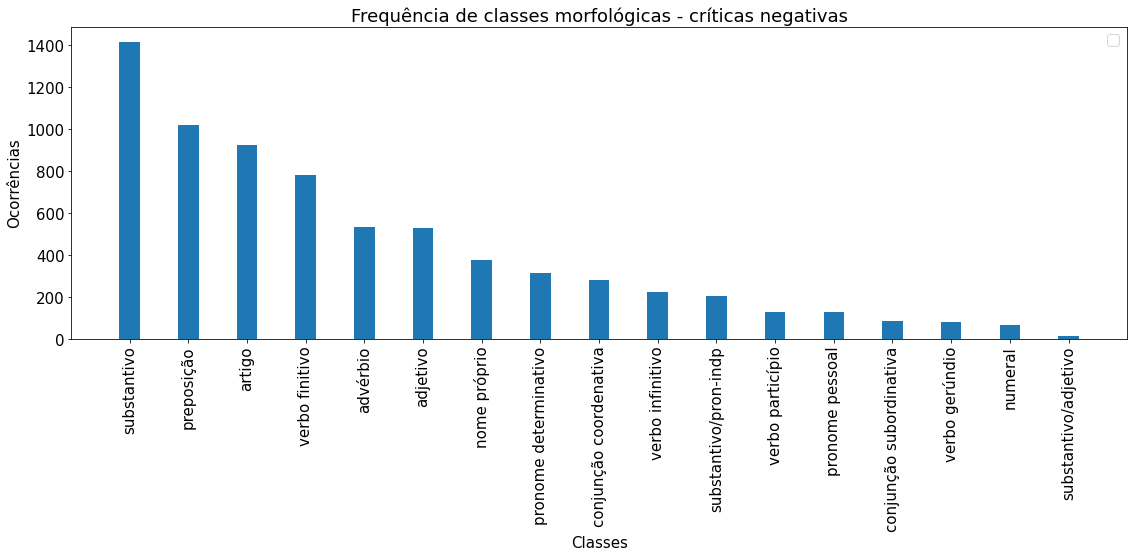

In [ ]:
x=fDist_class_k.most_common(20)
types=[w for (w,f) in x]
freq=[f for (w,f) in x]

plt.rcParams["figure.figsize"] = [16,8]

matplotlib.rcParams.update({'font.size': 15})

x = np.arange(len(types))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x,freq, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Ocorrências')

ax.set_title('Frequência de classes morfológicas - críticas negativas')
ax.set_xticks(x)
ax.set_xticklabels(types)
ax.set_xlabel('Classes')
ax.legend()
ax.tick_params(axis ='x', rotation = 90)
fig.tight_layout()


plt.show()

# Olhando o text concordance e as collocations

In [ ]:
from nltk.corpus import gutenberg
from nltk.text import Text
corpus = corpus_critica_positiva.words()
text = Text(corpus)

In [ ]:
text.concordance("Filme")

Displaying 25 of 96 matches:
atmosfera de Star Wars ! Assisam ! o filme é bom eu gostei muito , tem suas fal
r minha opinião , eu gostei muito do filme , porém , ele tem falhas que não pod
enha gostado da participação dele no filme . Mas também trouxe coisas muito boa
e Poe . Mas resumindo , eu gostei do filme e com certeza assistirei de novo . F
e e com certeza assistirei de novo . Filme incrível . Muito bem feito com uma h
eceu 😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔😔 Um filme que divide opiniões ! Na minha visão
e opiniões ! Na minha visão temos um filme com um designer de produção e efeito
o é muito bom e estão bem . Temos um filme que praticamente virou seriado , com
 estrelas porque realmente gostei do filme , ele não deixa você em momento algu
enas visões aleatórias , esse último filme dessa nova franquia , se encerra de 
tão exigente assim , afinal é aquele filme bem redondinho , cumpre o seu papel 
r " e é impossível dizer , que algum filme dessa franquia é ruim . Star Wars : 
- star - wa

In [ ]:
#Análise a esquerda com a palavra filme
critica_x = corpus_critica_positiva.sents('4p.txt')[0]
analise = ' '.join(critica_x)
texto = Text(word_tokenize(analise))
texto.concordance_list('filme')[0].left

['Ascenção', 'Skywalker', 'é', 'com', 'certeza', 'o', 'melhor']

In [ ]:
corpus2 = corpus_critica_negativa.words()
text2 = Text(corpus2)

In [ ]:
text2.concordance("Filme")

Displaying 25 of 107 matches:
s fizeram de O Despertar da Força um filme exemplar para a série – mesmo que ( 
ssim , mantendo a ótima qualidade do filme anterior de J . J . Abrams , que ret
nsão Skywalker ainda se prova um bom filme – afinal , a base de tudo destes nov
 ambos – mas , o que realmente faz o filme andar é a ligação entre Rey e Kylo R
to mar um dos momentos mais belos do filme .< br >< br > E já que falamos da pa
ue de humor bacana – nesta parte , o filme só desliza por não demonstrar bem o 
eserto é uma das cenas mais belas do filme ( e da franquia ).< br >< br > O lon
ra construir o que for melhor para o filme . Torna - se torturante assistir ao 
 . Torna - se torturante assistir ao filme que possua excesso de efeitos gráfic
 empolgado tanto , apenas o primeiro filme foi assistível . O segundo foi horrí
tudo , nunca vi tanta apelação em um filme só . É um filme legal , pq apesar di
tanta apelação em um filme só . É um filme legal , pq apesar disso não é chato 
pacidade s

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2bdbb82-530b-4b71-85fb-c683a0c0911d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>